# 2. k-means Clustering with Semidefinite Programming - 45 points

Clustering is and unsupervised machine learning problem in which we try to partition a given dataset into $k$ subsets based on distance between data points or similarity among them. The goal is to find $k$ centers and to assign each data point to one of the centers such that the sum of the square distances between them are minimal [1]. This problem is known to be NP-hard. 

## Clustering problem
Given a set of $n$ points in a $d$-dimensional Euclidean space, denoted by
\begin{equation*}
S = \{ \mathbf{s}_i = (s_{i1}, \cdots, s_{id})^\top~\in \mathbb{R}^d ~~ i = 1, \cdots, n\}
\end{equation*}
find an assignment of the $n$ points into $k$ disjoint clusters $\mathcal{S} = (S_1, \cdots, S_k)$ whose centers are $\mathbf{c}_j(j = 1, \cdots, k)$ based on the total sum of squared Euclidean distances from each point $\mathbf{s}_i$ to its assigned cluster centroid $\mathbf{c}_i$, i.e.,

$$
\begin{equation}
f(S,\mathcal{S}) = \sum_{j=1}^k\sum_{i=1}^{|S_j|}\|\mathbf{s}_i^{j} - \mathbf{c}_j \|^2,
\tag{Clustering Problem}
\end{equation}
$$

where $|S_j|$ is the number of points in $S_j$, and $\mathbf{s}_i^{j} $ is the $i^{th}$ point in $S_j$.

## Lloyd's algorithm for k-means



  **1.** Choose initial cluster centers $\mathbf{c}_1, \mathbf{c}_2, \cdots , \mathbf{c}_k$
  
  **2.** Repeat until convergence:
  $$\begin{cases}
  \text{Assignment step: }~~  \mathbf{s}_i ~~\text{belongs to cluster } j\text{, where} j := \text{argmin}_{j \in [1,k]} \|\mathbf{s}_i-\mathbf{c}_j\|   \\
  \text{Update each cluster center: }~~~~~~~~ \mathbf{c}_j = \frac 1{|S_j|} \sum_{i=1}^{|S_j|} \mathbf{s}_i^{j} \\
  \end{cases}$$


Note that the algorithm converges to local optimal points, so
\eqref{eq:cluster} can be arbitrarily bad depending on the
initialization of the cluster centers.


 **SDP relaxation of the problem:** The work (Peng & Wei, 2007)
proposes an SDP-relaxation to approximately solve the aforementioned
model-free $k$-means clustering problem. The resulting optimization
problem (See section (2) of (Peng & Wei, 2007) for details of this relaxation and Lecture 14 for a brief introduction.) takes the standard semidefinite programming form

$$\mathbf{X}^\star \in \arg \min_{ \mathbf{X} } \bigg\{ \langle \boldsymbol{C}, \mathbf{X} \rangle : ~\underbrace{\mathbf{X} \mathbf{1} =  \mathbf{1}}_{A_1(\mathbf{X}) = b_1},\underbrace{~\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}}_{A_2(\mathbf{X}) = b_2},~\underbrace{\mathbf{X} \geq 0}_{B(\mathbf{X}) \in \mathcal{K}},~\underbrace{\mathrm{Tr}(\mathbf{X}) \leq \kappa, ~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X}\succeq 0 }_{\mathcal{X}} \bigg\},
\tag{Problem 1}$$

where $C \in \mathbb{R}^{p \times p}$ is the
Euclidean distance matrix between the data points.
$\mathrm{Tr}(\mathbf{X}) \leq \kappa$ enforces approximately low-rank
solutions, the linear inclusion constraint $\mathbf{X} \geq 0$ is element-wise
nonnegativity of ${\mathbf{X}}$, the linear equality constraints
$\mathbf{X}\mathbf{1} = \mathbf{1}$ and $\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}$
require row and column sums of $\mathbf{X}$ to be equal to 1's, and
$\mathbf{X} \succeq 0$ means that $\mathbf{X}$ is positive semi-definite. Recall that
$\mathrm{Tr}(\mathbf{X}) = \|\mathbf{X}\|_\ast$ for any positive semi-definite matrix
$\mathbf{X}$.

The SDP in Problem 1 can be reformulated as

$$
\min_{\mathbf{X} \in \mathcal{X}}~~~ f(\mathbf{X}) + g_1(A_1(\mathbf{X})) + g_2(A_2(\mathbf{X})) \qquad\text{subject to}\qquad B(\mathbf{X}) \in \mathcal{K}, \tag{Equation 2}
$$

where $f(\mathbf{X}) = \langle  \boldsymbol{C}, \mathbf{X} \rangle$ is a
smooth convex function, $g_1=\delta_{\{b_1\}}(\cdot)$ is the indicator
function of singleton $\{b_1\}$, $g_2=\delta_{\{b_2\}}(\cdot)$ is the
indicator function of singleton $\{b_2\}$ and ${\mathcal{K}}$ is the
positive orthant for which computing the projection is easy.

## 2.1 Theory - 25 points

#### Question 2.1.1 (2 pts) 
Would Frank-Wolfe be a valid approach to solve this problem? Elaborate on your answer. 

<font color=‘blue’>
    
Classical Frank-Wolfe requires a smooth function to be able to calculate the gradient. The SDP relaxation reformulation of Problem 1 is non-smooth because it contains indicator functions $g_1=\delta_{\{b_1\}}(\cdot)$ and $g_2=\delta_{\{b_2\}}(\cdot)$, which are non-smooth.

In the sequel, we will attempt to solve this problem with the HomotopyCGM method (**Algorithm 1**) proposed in
(Yurtsever et al., 2018) to handle the non-smooth problems with a
conditional gradient based method.
Another option for solving this problem is PD3O
method (**Algorithm 2**).

#### Question 2.1.2 (3 pts) Characterizing the domain

Show that the domain $\mathcal{X} = \{\mathbf{X}: \mathrm{Tr}(\mathbf{X}) \leq \kappa,~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X} \succeq 0\}$ is a convex set. For this purpose, apply the definition of set convexity.


<font color=‘blue’>

To show that $\mathcal{X}$ is convex, we need to prove that $ \forall X_1, X_2 \in \mathcal{X}$ and $ \forall \theta \in [0,1]$, all the matrices M defined as
$$
M \;=\; \theta X_1 \;+\; (1 - \theta)\,X_2
$$
are also in $\mathcal{X}$.

To show that $M \in \mathcal{X}$ we need to verify the 3 conditions that define $\mathcal{X}$:

1. **Trace Condition**  
   $$
   \mathrm{Tr}(M) = \mathrm{Tr}(\theta X_1 + (1-\theta)X_2) = \theta\,\mathrm{Tr}(X_1) \;+\; (1-\theta)\,\mathrm{Tr}(X_2)
   $$
   because the trace is a linear operator. And since $\mathrm{Tr}(X_1) \leq \kappa$ and $\mathrm{Tr}(X_2) \leq \kappa$, it follows that
   $$
   \mathrm{Tr}(M) \le \theta\,\kappa + (1-\theta)\,\kappa = \kappa.
   $$

2. **Matrix Dimension**  
   Clearly, $M \in \mathbb{R}^{p \times p}$ because it is a linear combination of $X_1, X_2 \in \mathbb{R}^{p \times p}$.

3. **Positive Semidefiniteness**  
   $X_1 \succeq 0$ and $X_2 \succeq 0$ means that $\forall u:\,u^T X_1\,u \ge 0$ 
   and $\forall u:\,u^T X_2\,u \ge 0$. It follows that:
   $$
   u^T M\,u = u^T (\theta\,X_1 + (1-\theta)\,X_2)\,u = \theta\,u^T X_1\,u + (1-\theta)\,u^T X_2\,u \ge 0
   $$

   And therefor $M = \theta X_1 + (1-\theta)X_2 \succeq 0$. (It is also a known mathematical fact that a convex combination of PSD matrices is PSD)

So, $M\in\mathcal{X}$ whenever $X_1, X_2 \in \mathcal{X}$ and $\theta \in [0,1]$ and therefore $\mathcal{X}$ is a convex set.

#### Question 2.1.3  (8 pts) Gradient of the penalized objective

Given a linear inclusion constraint $Tx \in \mathcal{Y}$,
the corresponding quadratic penalty function is given by
$$\text{QP}_\mathcal{Y}(x) = \text{dist}^2(Tx, \mathcal{Y}) = \min_{y \in \mathcal{Y}} \| y-Tx\|^2.$$
Write down the constraints in (Equation 2) in
the quadratic penalty form. 

Write down the penalized objective based on the formulation in Lecture 13 with penalty parameter $\beta$.



<font color=‘blue’>

Equation 2 is the SDP in the form

$$
\min_{\mathbf{X} \in \mathcal{X}}~~~ f(\mathbf{X}) + g_1(A_1(\mathbf{X})) + g_2(A_2(\mathbf{X})) \qquad\text{subject to}\qquad B(\mathbf{X}) \in \mathcal{K}
$$

where:

1. $f(\mathbf{X}) = \langle \mathbf{C}, \mathbf{X}\rangle$ is smooth and convex.
2. $g_1(\cdot) = \delta_{\{b_1\}}(\cdot)$ and $g_2(\cdot) = \delta_{\{b_2\}}(\cdot)$ are indicator functions enforcing $A_1(\mathbf{X}) = b_1$ and $A_2(\mathbf{X}) = b_2$ respectively
3. $B(\mathbf{X}) \in \mathcal{K}$ enforces the element‐wise nonnegativity of $\mathbf{X}$, so $\mathbf{X} \geq 0$

and considering that $~\mathbf{X} \in \mathbb{R}^{p\times p}$ as stated in Problem 1.

So, the “hard constraints” are:
- $A_1(\mathbf{X}) \in \{b_1\}$,
- $A_2(\mathbf{X}) \in \{b_2\}$,
- $B(\mathbf{X}) \in \mathcal{K}$

These three "hard constraints" can be expressed the following ways in quadratic penalty form:

1. $A_1(\mathbf{X}) = b_1$, equivalent to $A_1(\mathbf{X}) \in \{\,b_1\}$, is in penalty form:
   $$
   QP_{\{b_1\}} = \text{dist}^2\!(A_1(\mathbf{X}), \{\,b_1\}) = \|\,A_1(\mathbf{X}) - b_1\|^2.
   $$

2. $A_2(\mathbf{X}) = b_2$, equivalent to $A_2(\mathbf{X}) \in \{\,b_2\}$, is in penalty form:
   $$
   QP_{\{b_2\}} = \text{dist}^2\!(A_2(\mathbf{X}), \{\,b_2\}) = \|\,A_2(\mathbf{X}) - b_2\|^2.
   $$

3. $B(\mathbf{X}) \in \mathcal{K}$ is in penalty form
   $$
   \text{dist}^2\!(B(\mathbf{X}), \mathcal{K}) = \min_{Y \in \mathcal{K}} \|\,Y - B(\mathbf{X})\|^2.
   $$

As mentioned in lectures 13 and 14, we can replace hard constraints by penalty terms and the penalty parameter $\beta$ (or $\mu$) scales "how much" a deviation from the constraints should be penalized. The big advantage of the penalty form is that a constrained problem, which is difficult to solve, is transformed in an unconstrained one, which is easier to solve.

The penalized objective in quadratic penalty from is therefore:

$$
F_\beta(\mathbf{X}) = f(\mathbf{X}) + \frac{\beta}{2}
\Bigl[
  \underbrace{\|\,A_1(\mathbf{X}) - b_1\|^2}_{\text{penalty for }A_1(\mathbf{X})\notin\{b_1\}}
  +
  \underbrace{\|\,A_2(\mathbf{X}) - b_2\|^2}_{\text{penalty for }A_2(\mathbf{X})\notin\{b_2\}}
  +
  \underbrace{\min_{Y \in \mathcal{K}}
    \|\,B(\mathbf{X}) - Y\|^2}_{\text{penalty for }B(\mathbf{X})\notin\mathcal{K}}
\Bigr].
$$

Equivalently, one could write these as three separate penalty terms, all multiplied by $\beta$. If $\beta$ is large, the solution is pushed to satisfy the constraints almost exactly. If $\beta$ is small, some violations of the constraints are allowed.

#### Question 2.1.4 (7 pts) 

Derive the gradient of the penalized objective explicitly  by deriving the gradient and projection specific to (Equation 2) -->. 
(Hint: You can write
$\text{dist}^2(Tx, \mathcal{Y}) = \| y^\ast - Tx \|^2$, where
$y^\ast = \arg \min _{y\in \mathcal{Y}} \| y - Tx \|^2$. and take
the derivative with respect to $\mathbf{X}$ without worrying about
$y^\ast$ depending on $\mathbf{X}$, thanks to Danskin's theorem.

<font color=‘blue’>

The penalized objective is defined as:  

$$
F_\beta(\mathbf{X}) = f(\mathbf{X}) + \frac{\beta}{2}
\Bigl[
  \|\,A_1(\mathbf{X}) - b_1\|^2
  +
  \|\,A_2(\mathbf{X}) - b_2\|^2
  +
  \min_{Y \in \mathcal{K}}
    \|\,Y - B(\mathbf{X})\|^2
\Bigr]
$$

considering that $~\mathbf{X} \in \mathbb{R}^{p\times p}$ as stated in Problem 1.


Since $F_\beta(\mathbf{X})$ is a sum of different terms, to take the gradient of $F_\beta(\mathbf{X})$ we can look at each term independantly:

1. $f(\mathbf{X}):$
As defined in the problem statement, we have $f(\mathbf{X}) = \langle \mathbf{C}, \mathbf{X} \rangle$, where $\mathbf{C}$ is a constant matrix. Therefore its gradient is:
$$
\nabla f(\mathbf{X}) = \mathbf{C}
$$

2. The first penalty is $p_1(\mathbf{X}) = \frac{\beta}{2} \|A_1(\mathbf{X}) - b_1\|^2$
And taking the gradient leads to:
$$
\nabla p_1(\mathbf{X}) = \beta A_1^T(A_1(\mathbf{X}) - b_1)
$$

3. The second penalty is $p_2(\mathbf{X}) = \frac{\beta}{2} \|A_2(\mathbf{X}) - b_2\|^2$
And taking the gradient leads to:
$$
\nabla p_2(\mathbf{X}) = \beta A_2^T(A_2(\mathbf{X}) - b_2)
$$

4. The penalty term for the nonnegativity contraint $B(\mathbf{X}) \in \mathcal{K}$ is $p_3(\mathbf{X}) = \frac{\beta}{2} \min_{Y \in \mathcal{K}} \|Y - B(\mathbf{X})\|^2$

We set $Y^* = \arg\min_{Y \in \mathcal{K}} \|Y - B(\mathbf{X})\|^2$, where $Y^*$ represents the projection of $X$ onto $\mathcal{K}$.
Using Danskin’s theorem, we can treat $Y^*$ as independant from $X$ and get:
$$
\nabla p_3(\mathbf{X}) = \beta (X - Y^*)
$$

We dropped $B$ in the gradient $\nabla p_3$ because it is the identity map and does therefor not change the value of the gradient.

The total gradient of the penalized objective $F_\beta(\mathbf{X})$ is the sum of the gradients of all the terms:
$$
\nabla F_\beta(\mathbf{X}) = \nabla f(\mathbf{X}) + \nabla p_1(\mathbf{X}) + \nabla p_2(\mathbf{X}) + \nabla p_3(\mathbf{X}).
$$

And when substituting the computed gradients we get:
$$
\nabla F_\beta(\mathbf{X}) = \mathbf{C} + \beta A_1^T(A_1(\mathbf{X}) - b_1) + \beta A_2^T(A_2(\mathbf{X}) - b_2) + \beta (X - Y^*)
$$

where $Y^*$ is equal to the projection of $X$ onto $\mathcal{K}$.

#### Question 2.1.5 (5 pts) 

The algorithm PD3O (Yan, Ming, 2018) can be used to solve the problem

$$ \begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}$$

where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$.
#### PD3O splitting method
  ------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}, y^0\in\mathbb{R}^{2p+p^2}$ and $\tau, \sigma >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$\begin{cases}
  x^{k+1} &= \mathrm{prox}_{\tau h}(x^k - \tau (\nabla f(x^k) + A^\top y^k)) \\
  \tilde x^{k+1} &= 2x^{k+1} - x^k +  \tau \nabla f(x^k)-  \tau \nabla f(x^{k+1})\\
  y^{k+1} &= \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1}))
  \end{cases}$$ 
  
  **3.Output: $~x^k$**
  
  ---------------------------------------------------------------------------------------------------------------------------------


In particular, define
$$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$
and
$$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$

Using the definitions we used for $g$ and $A$
in (Definition of A)
and (Definition of g), show that the $y^{k+1}$ update step of
PD3O can be written in the form
$$y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1}) \end{bmatrix},$$
and
$$A^\top y^{k+1} = A^\top y^k + \sigma (A_1^\top(A_1 (\tilde x^{k+1}) - b_1) + A_2^\top (A_2 (\tilde x^{k+1}) - b_2) +B^\top(B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + B\tilde x^{k+1}))),$$
where the vector $y$ in the dual domain can be written in the form
$y = [y_1~,~y_2~,~y_3]^\top$ with $y_1, y_2\in\mathbb{R}^p$ and
$y_3 \in\mathbb{R}^{p^2}$ (see
also (Definition of A)).

**Hint**: Use Moreau's decomposition to write the update using
$\mathrm{prox}_{g}$ instead of $\mathrm{prox}_{g^\ast}$. In
particular
$$y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) \\
%&= y^k + \sigma (A_1\tilde x^{k+1} + A_2\tilde x^{k+1} + \tilde x^{k+1}) - \sigma (b_1+b_2+\mathrm{proj}_\mathcal{K}(\sigma^{-1}y^k + \tilde x^{k+1}))$$
The remaining steps are to
use (Definition of A) and find how to compute
$\mathrm{prox}_{g}$ when $g$ is in the decomposed form given
in (Definition of g).

<font color=‘blue’>

As suggested, we use Moreau's decomposition to rewrite the $y^{k+1}$ update step as:

$$
y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A(\tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})). \tag{1}
$$

We then substitute the definition of $A$ into (1):

$$
y^{k+1} = y^k + \sigma 
\begin{bmatrix}
A_1\tilde x^{k+1} \\
A_2\tilde x^{k+1} \\
B\tilde x^{k+1}
\end{bmatrix}
- \sigma \mathrm{prox}_{\sigma^{-1} g}
\begin{bmatrix}
\sigma^{-1}y_1^k + A_1\tilde x^{k+1} \\
\sigma^{-1}y_2^k + A_2\tilde x^{k+1} \\
\sigma^{-1}y_3^k + B\tilde x^{k+1}
\end{bmatrix}. \tag{2}
$$

Now, we compute the proximal operator part of (2) using the definition of $g$ and the proximal operator as introduced in lecture 7

$$
\mathrm{prox}_{\sigma^{-1} g} \left( \begin{bmatrix}
\sigma^{-1}y_1^k + A_1\tilde x^{k+1} \\
\sigma^{-1}y_2^k + A_2\tilde x^{k+1} \\
\sigma^{-1}y_3^k + B\tilde x^{k+1}
\end{bmatrix} \right) 
= \arg \min_y \left( g(y) + \frac{\sigma}{2} \left\| y - 
\begin{bmatrix}
\sigma^{-1}y_1^k + A_1\tilde x^{k+1} \\
\sigma^{-1}y_2^k + A_2\tilde x^{k+1} \\
\sigma^{-1}y_3^k + B\tilde x^{k+1}
\end{bmatrix}
\right\|^2 \right),
$$

$$
= \arg \min_y \left( \delta_{\{b_1\}}(y_1) + \delta_{\{b_2\}}(y_2) + \delta_{\mathcal{K}}(y_3) + \frac{\sigma}{2} \left\|
\begin{bmatrix}
y_1 - \sigma^{-1}y_1^k + A_1\tilde x^{k+1} \\
y_2 - \sigma^{-1}y_2^k + A_2\tilde x^{k+1} \\
y_3 - \sigma^{-1}y_3^k + B\tilde x^{k+1}
\end{bmatrix}
\right\|^2 \right),
$$

For each part of $y$, we find the argmin:
- $\delta_{\{b_1\}}(y_1) = 0$ when $y_1 = b_1$
- $\delta_{\{b_2\}}(y_2) = 0$ when $y_2 = b_2$
- $\delta_{\mathcal{K}}(y_3) = 0$ when $y_3 \in \mathcal{K}$, so $y_3 = \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1})$

Therefore, the proximal operator reduces to:
$$
\mathrm{prox}_{\sigma^{-1} g} \left( 
\begin{bmatrix}
\sigma^{-1}y_1^k + A_1\tilde x^{k+1} \\
\sigma^{-1}y_2^k + A_2\tilde x^{k+1} \\
\sigma^{-1}y_3^k + B\tilde x^{k+1}
\end{bmatrix} \right)
= 
\begin{bmatrix}
b_1 \\
b_2 \\
\mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1})
\end{bmatrix}
$$

Substituting this into (2), we get:

$$
y^{k+1} = y^k + \sigma 
\begin{bmatrix}
A_1\tilde x^{k+1} \\
A_2\tilde x^{k+1} \\
B\tilde x^{k+1}
\end{bmatrix}
- \sigma 
\begin{bmatrix}
b_1 \\
b_2 \\
\mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1})
\end{bmatrix}
$$

Which simplifies to:

$$
y^{k+1} = 
\begin{bmatrix}
y_1^k \\
y_2^k \\
y_3^k
\end{bmatrix}
+ \sigma 
\begin{bmatrix}
A_1\tilde x^{k+1} - b_1 \\
A_2\tilde x^{k+1} - b_2 \\
B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1})
\end{bmatrix}
$$

If we now apply $A^\top$ on $y^{k+1}$:

$$
A^\top y^{k+1} = A^\top y^k + \sigma A^\top
\begin{bmatrix}
A_1\tilde x^{k+1} - b_1 \\
A_2\tilde x^{k+1} - b_2 \\
B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1})
\end{bmatrix}.
$$

And since $A^\top = [A_1^T \; A_2^T \; B^T]$, we get:

$$
A^\top y^{k+1} = A^\top y^k + \sigma \left( 
A_1^\top(A_1\tilde x^{k+1} - b_1) + 
A_2^\top(A_2\tilde x^{k+1} - b_2) + 
B^\top(B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1}))
\right).
$$

## 2.2 Practice - 20 points

In [1]:
from lib.part2.helpers import *
from lib.part2.Llyod_kmeans import *

### Define operators
We provide 2 operators and their conjugates:
1. `A1`: Linear operator that takes the row sums
2. `At2`: Conjugate of operator A1
3. `A2`: Linear operator that takes the column sums 
4. `At2`: Conjugate of operator A2

### Algorithm 1. Homotopy CGM

You will first implement Homotopy CGM which is defined below for the problem specified in (Equation 2).

  #### Homotopy Conditional Gradient Method (HCGM)
  ---------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}$ and $\beta_0 >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$
  \begin{cases}
  \gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 \sqrt{k+1} \\
  v_k &=  \nabla f(x_k) + \beta_k [A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))]\\
  \hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}
  $$
  
  **3.** Output:$~x^{k+1}$
  
  ---------------------------------------------------------------------------------------------------------------------------------

HCGM is designed for solving constrained minimization problems of the form in (Equation 2). We define such a constrained problem in the following cell, where we specify an objective $f$ and a set of penalities $\{g_i\}$.


In [2]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X: C
)

g1 = Function(
    f = lambda X : 0.5 * np.linalg.norm((A1(X) - b))**2,
    grad = lambda X: At1(A1(X) - b)
)

g2 = Function(
    f = lambda X : 0.5 * np.linalg.norm((A2(X) - b))**2,
    grad = lambda X: At2(A2(X) - b)
)

g3 = Function(
    f = lambda X : 0.5 * np.sqrt(np.sum((X-np.maximum(X, 0))**2)),
    grad = lambda X: 1000*(X-np.maximum(X, 0)) # <-- fill in (x_k - proj_K(x_k))
)

p = ConstrainedProblem(f = f, penalties = [g1, g2, g3])


**Remark**: The 1000 factor in the term for $(x_k - \text{proj}_{\mathcal{K}}(x_k))$ in Algorithm 1 is in order to obtain a better practical convergence. This basically corresponds to having different penalty parameters for different constraints.

#### Question 2.2.1 (5 pts)

Complete the missing lines in the function
definitions of `HCGM`, which implements Homotopy CGM.

In [3]:
@dataclass
class HCGM_state(OptState):
    x_k: Matrix
    k: int
    beta0: float

In [4]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

For the update recall that a `ConstrainedProblem` can be unpacked as follows:

- `f` which is a `Function` that has a `grad` method
- `penalties` which is a list of functions each having a `grad` method

In [5]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    f, penalties = p
    x_k, k, beta0 = state
    
    gamma_k = 2/(k+1)
    beta_k = beta0*np.sqrt(k+1)
    
    v_k = f.grad(x_k) + beta_k*(penalties[0].grad(x_k) + penalties[1].grad(x_k) + penalties[2].grad(x_k))

    X_bar = lmo(v_k, kappa) # as provided in helpers.py and introduced in lecutre 7, slide 34

    X_next = (1-gamma_k)*x_k + gamma_k*X_bar

    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [6]:
HCGM = OptAlgorithm(name="HCGM", init_state = HCGM_initialize, state_update = HCGM_update)

#### Question 2.2.2 (2 pts) Run HCGM

Run `HCGM` for $5000$-iterations and plot the result.

In [7]:
X_HCGM, f1_HCGM, f2_HCGM, f3_HCGM, obj_HCGM, iter_HCGM, time_HCGM = run_HCGM(HCGM, p, maxit=5000, beta0=1.0)

  0%|          | 0/5000 [00:00<?, ?it/s]

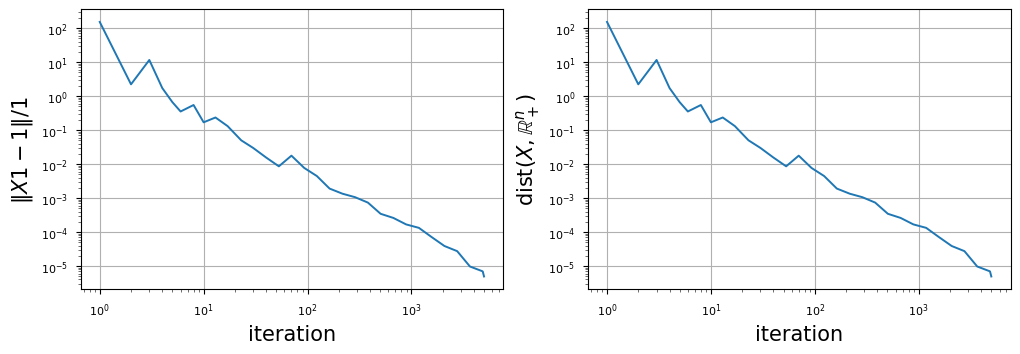

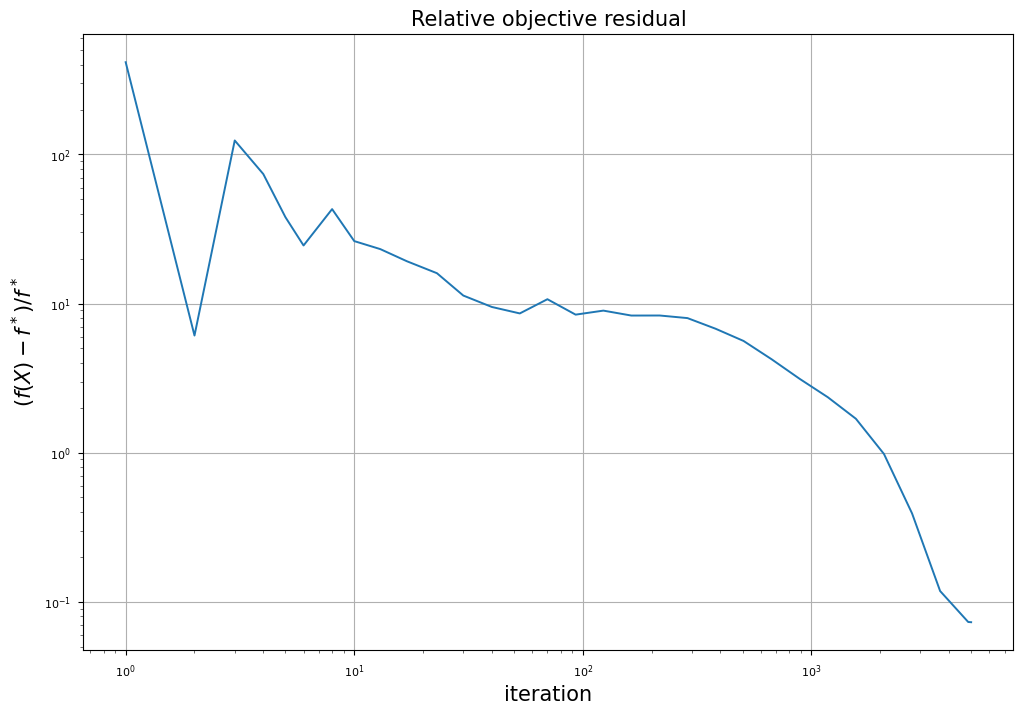

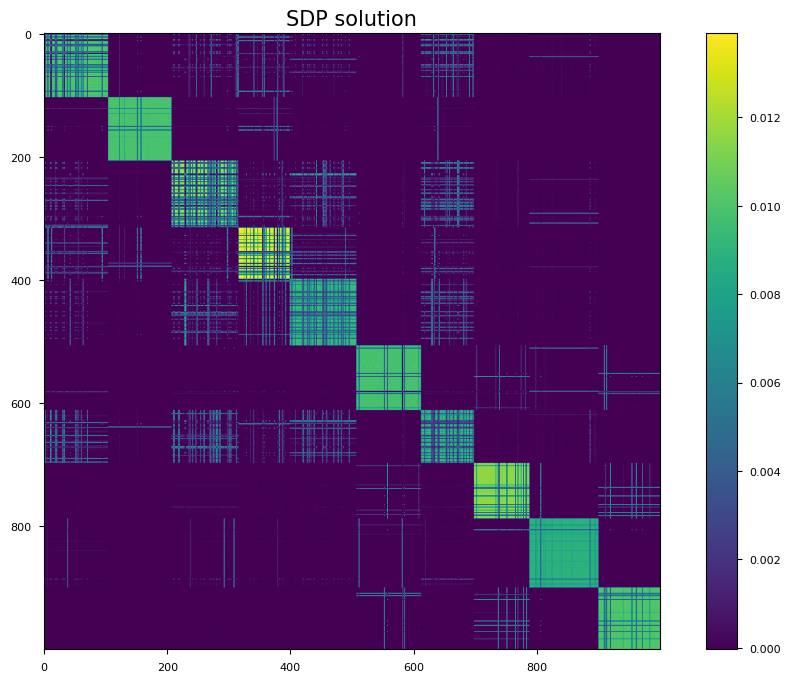

In [8]:
plot_func(iter_HCGM, f1_HCGM,f2_HCGM, obj_HCGM, X_HCGM, opt_val)

### Algorithm 2. PD3O splitting

To implement PD3O we need to specify the proximal operator of $h$ and $g^*$ as well as the linear operator $A$. We do so in the following cell. Note that the `DualVariable` class is created to keep track of all three dual variable $(y_1,y_2,y_3)$ in a concise way.
In the following cells fill in the proximal operators of $h$ and $g$.

**Hint**: Recall that the proximal operator of an indicator function is a projection. We give you the `projSDP`, which projects onto $\mathcal X$. Further, the proximal operator of a seperable sum is a concatenation of the proximal operators of each term (see the lecture on proximal methods).

In [9]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X : C
)

h = Function(
    f = lambda X : 0 if (ispsd(X) and np.trace(X) <= kappa) else float('inf') ,
    prox = lambda tau, X: projSDP(X, kappa)
)

g = Function(
    f = lambda y: 0 if (y.y_1==b) and (y.y_2==b) and (np.all(y.y_3 >=0)) else float('inf'),
    prox = lambda sigma, y: DualVariable(b, b, np.maximum(y.y_3,0))
)

def A(x):
    return DualVariable(A1(x), A2(x), x)

def A_T(y):
    return At1(y.y_1)+ At2(y.y_2)+ y.y_3

composite = (f, g, h, A, A_T)

#### Question 2.2.3 (5 pts)

Complete the missing lines in the function
definitions of `PD3O` 

**Remarks:** 

- In our case, we advise you to **multiply the step-size for $y_3$ by $10^4$** to obtain a better practical convergence. It is possible to use different dual step sizes, $\{ \sigma_1 , \sigma_2, \sigma_3 \}$.  Such a diagonal variable stepsize is supported through `[sigma1, sigma2, sigma3]*dual_variable`.
- The algorithm needs the proximal operator of $g^*$, the Fenchel dual of $g$, using the Moreau identity express the prox of $g^*$ in terms of the prox of $g$. You will need to multiply by the stepsize `Sigma` and its inverse `Sigma_inv` which we provide in the code below.

In [10]:
@dataclass
class PD3O_state(OptState):
    x_k: Matrix
    y_k: DualVariable(Vector, Vector, Matrix)
    tau: float
    sigma: float

In [11]:
def PD3O_initialize(composite, x_zero):
    L = 1e2
    tau = 1/L
    return PD3O_state(x_k = x_zero, y_k = A(x_zero), tau=tau, sigma=1/(L**2*tau))

def PD3O_update(composite, state):
    f, g, h, A, A_T = composite
    y_k = state.y_k
    x_k, _, tau, sigma = state
    
    next_x_k = h.prox(tau, x_k - tau*(f.grad(x_k) + A_T(y_k)))

    x_bar = 2*next_x_k - x_k + tau*f.grad(x_k) - tau*f.grad(next_x_k)
    
    Sigma = [sigma, sigma, sigma*1e4]
    Sigma_inv = [1/sigma, 1/sigma, 1/(sigma*1e4)]
    next_y_k = y_k + Sigma*A(x_bar) - Sigma*g.prox(Sigma_inv, Sigma_inv*y_k + A(x_bar))
    
    return PD3O_state(next_x_k, next_y_k, tau, sigma)





In [12]:
PD3O = OptAlgorithm(name="PD3O", init_state = PD3O_initialize, state_update = PD3O_update)

#### Question 2.2.4 (2 pts) Run PD3O

Run `PD3O` for $1000$-iterations and plot the result.

In [13]:
X_PD3O, f1_PD3O, f2_PD3O, obj_PD3O, iter_PD3O, time_PD3O = run_PD3O(PD3O, composite, maxit=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

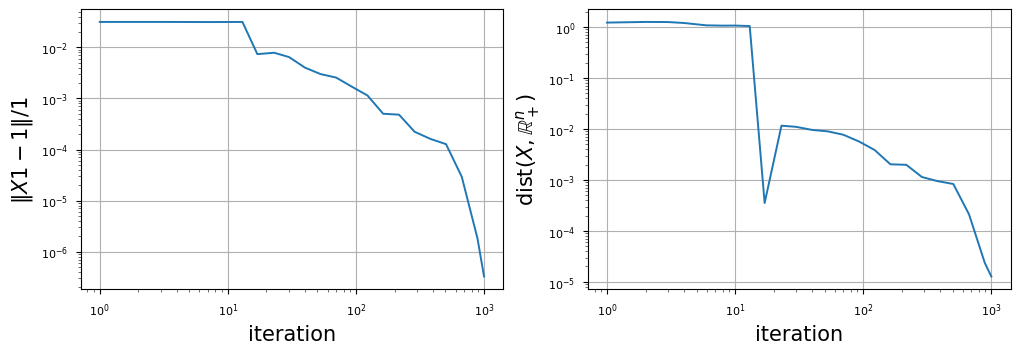

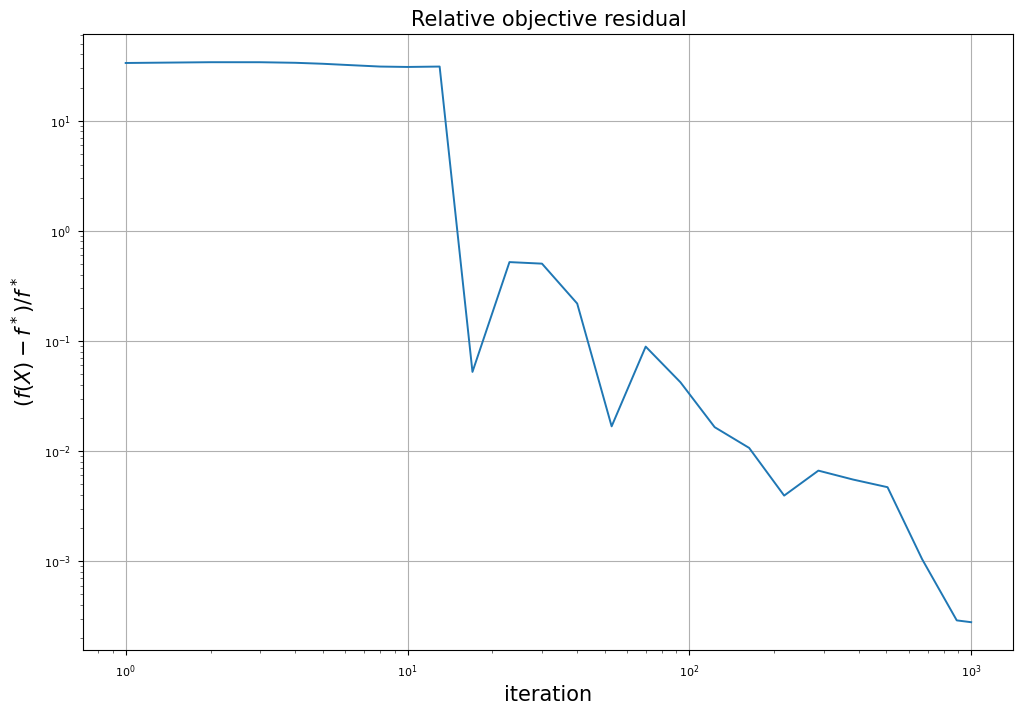

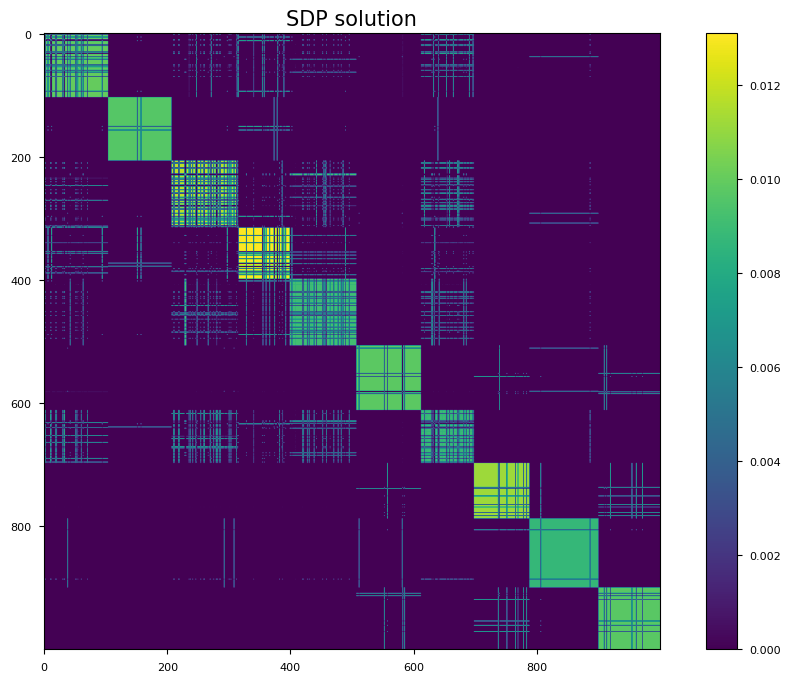

In [14]:
plot_func(iter_PD3O, f1_PD3O,f2_PD3O, obj_PD3O, X_PD3O, opt_val)

### Comparing HCGM and PD3O

#### Question 2.2.5 (3 pt)

Plot the results with the function `plot_comp`. What are the final objective values? Are they below the optimal value provided to you in `opt_val`? If yes, explain the reason. Answer in the box below.

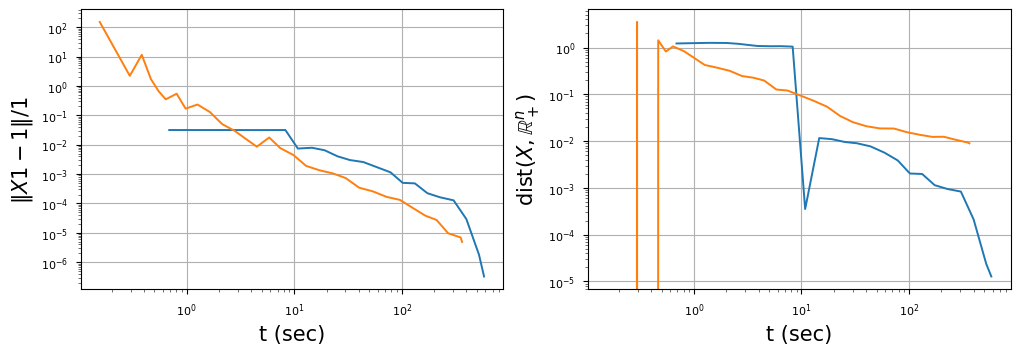

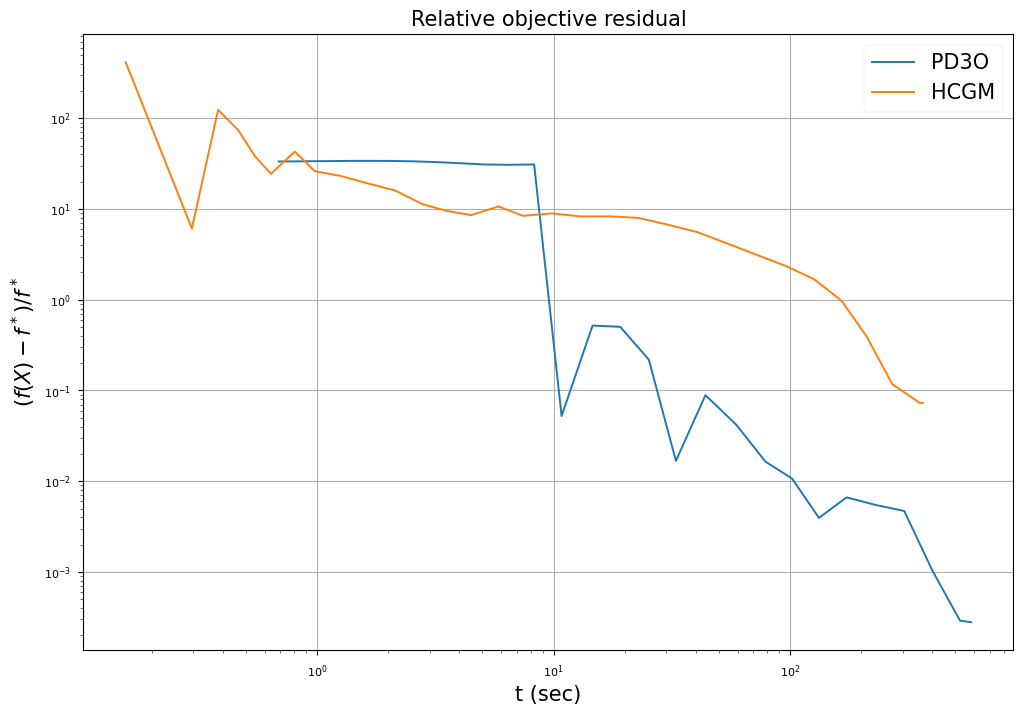

Optimal value: 57.053391868140864
Final value for PD3O: 57.0374745932147
Final value for HCGM: 52.897339191911875


In [15]:
times = (time_PD3O, time_HCGM)
feas1 = (f1_PD3O, f1_HCGM)
feas2 = (f2_PD3O, f3_HCGM)
obj   = (obj_PD3O, obj_HCGM)
plot_comp(times, feas1,feas2, obj, opt_val)

print(f"Optimal value: {opt_val[0][0]}")
print(f"Final value for PD3O: {obj[0][-1]}")
print(f"Final value for HCGM: {obj[1][-1]}")

In [16]:
# For PD3O we see that its objective values are (almost) always smaller than the optimal value
# Which means that PD3O approaches the objective value from below
print(obj[0]) #-> comes form below

[-1850.3213763826282, -1881.511508514335, -1880.626100260416, -1857.9503398600057, -1819.404089524749, -1776.3444647673068, -1712.6617253471995, -1698.3701597511133, -1713.07490056435, 54.06809486888703, 27.389851579277213, 28.338460115297757, 44.583635213596075, 56.09704358067168, 51.98837995688081, 59.45615013177908, 56.113634030561904, 56.44423600691801, 56.82865858207205, 56.67453823245656, 56.73907696975864, 56.78550220907805, 56.99398808105178, 57.03685625764372, 57.0374745932147]


<font color=‘blue’>

As we can see both final objective values for PD3O and HCGM are (slightly) below the optimal value. This is at first counterintuitive, since the optimal value is the lowest possible feasible solution of the intial problem. For **HCGM** we can explain the lower final objective value by the relaxtion of the problem that we introduced. By writing the objective in penalty form instead of using hard constraints the problem gets easier to solve, but values that in the initial problem are unfeasible are now feasible solutions and therefor it is possible to attein a value that is lower than the optimal value. **PD3O** tries to solve the dual problem and therefore approaches the optimal solution from below, which explains why the final objective value is smaller than the optimal value.

#### Rounding: Get the assignments from the result of the SDP
Getting the assignments requires going back to the $10$ dimensional space discussed before, and using the coordinates multiplied with the obtained matrix to construct a "denoised" version of the data points. This allows then to find the clusters from these $10$ dimensional data. Our implementation is the python reimplementation of their matlab code which can be found on [github](https://github.com/solevillar/kmeans_sdp).

In [17]:
center_HCGM, assign_HCGM = sdp_rounding(X_HCGM,10, digits)
center_PD3O, assign_PD3O = sdp_rounding(X_PD3O,10, digits)

#### k-means value: HCGM & PD3O

Using the function `value_kmeans`, run the cell below to obtain the $k$-means value before and after running both algorithms. 

    

In [18]:
k_means_before = value_kmeans(digits, labels-1) # k_means value with true labels
k_means_after_HCGM  = value_kmeans(digits, assign_HCGM) # k_means value with assigned lables
k_means_after_PD3O  = value_kmeans(digits, assign_PD3O) # k_means value with assigned lables

print('k-means value initial: {:.4f}'.format(k_means_before))
print('k-means value for HCGM: {:.4f}'.format(k_means_after_HCGM))
print('k-means value for PD3O: {:.4f}'.format(k_means_after_PD3O))

k-means value initial: 150.9680
k-means value for HCGM: 28.7269
k-means value for PD3O: 28.7269


#### Question 2.2.6 (3 pts) k-means value: Lloyd's algorithm

Run the function `kmeans` a few times and report the $k$-means value obtained by Llyod's algorithm. Compare it with the ones obtained by rounding the solution of convex methods `HCGM` and `PD3O`.  Comment on the result.

In [19]:
from tqdm import tqdm
kmeans_res = []

for _ in range(100):
    centers_Lloyd, classifications_Lloyd, k_means_Lloyd = kmeans(digits.T, 10)#k_means value with Lloyds k-means algorithm
    kmeans_res.append(k_means_Lloyd)

print("**Results for 100 Runs of Llyod's algorithm**")
print(f"Max k-means for Lloyd's algorithm: {max(kmeans_res):.4f}")
print(f"Min k-means for Lloyd's algorithm: {min(kmeans_res):.4f}")
print(f"Mean k-means for Lloyd's algorithm: {np.nanmean(kmeans_res):.4f}")
# print('k-means value for lastLloyd''s algorithm: {:.4f}'.format(k_means_Lloyd))

c:\Users\timar\OneDrive\Dokumente\Studium\MA3\MathsOfData\mod-h3\lib\part2\Llyod_kmeans.py:37: RuntimeWarning: Mean of empty slice.
  new_centroids[j] = X_C.mean(axis = 0)
c:\Users\timar\anaconda3\envs\adaexam\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Failed to converge!
Failed to converge!
**Results for 100 Runs of Llyod's algorithm**
Max k-means for Llyod's algorithm: 404.7158
Min k-means for Llyod's algorithm: 28.7264
Mean k-means for Llyod's algorithm: 158.4667


<font color=‘blue’>
    
As shown by the min, max and mean value, the performance of clustering with Lloyd's algorithm, measured by the k-means value, depends heavily on the initialization and can therefor me arbitrarily bad. If the initialization is good, Lloyd's Algorithm can achieve the same performance as the convexe methods HCGM and PD3O, but on average it performs much worse, because it converges to local optimas.

## OPTIONAL: Additional results for clustering fMNIST Data

### Misclassification rates: HCGM & PD3O


**Dataset:** We use the fashion-MNIST data in (Xiao et al. 2017) which is released as
a possible replacement for the MNIST handwritten digits . Each data
point is a 28x28 grayscale image, associated with a label from 10
classes. Classes
are labeled from 0 to 9. First, we extract the meaningful features from
this dataset using a simple 2 layers neural network with a sigmoid
activation. Then, we apply neural network to 1000 test samples from the
same dataset, which gives us a vector $\eta \in \mathbb{R}^{10}$ where
each entry represents the probability being in that class. Then, we form
the pairwise distance matrix $\boldsymbol{C}$ by using this probability
vectors (In the code, you do not need to worry about any of the processing
    details mentioned here. You are directly given the matrix
    $\mathbf{C}$.).

In [20]:
print('Misclassification rate for HCGM: {:.4f}'.format(misclassification_rate(assign_HCGM, labels)))
print('Misclassification rate for PD3O: {:.4f}'.format(misclassification_rate(assign_PD3O, labels)))

Misclassification rate for HCGM: 0.1250
Misclassification rate for PD3O: 0.1250


### Visualize samples and predicted labels

In [21]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [22]:
def vis_samples(assignment, images, labels):
    assignment=assignment.astype(int)
    classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    labels = labels-1
    rand_samp = np.random.randint(0,1000,25)
    plt.figure(figsize=(7,7))
    for i,samp in enumerate(rand_samp):
        plt.subplot(5,5,i+1)
        plt.imshow(1-np.reshape(images[samp],[28,28]), cmap=plt.cm.gray)
        plt.title('Pred. {0}\n Orig. {1}'.format(classes[assignment[samp].item()],classes[labels[samp].item()]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

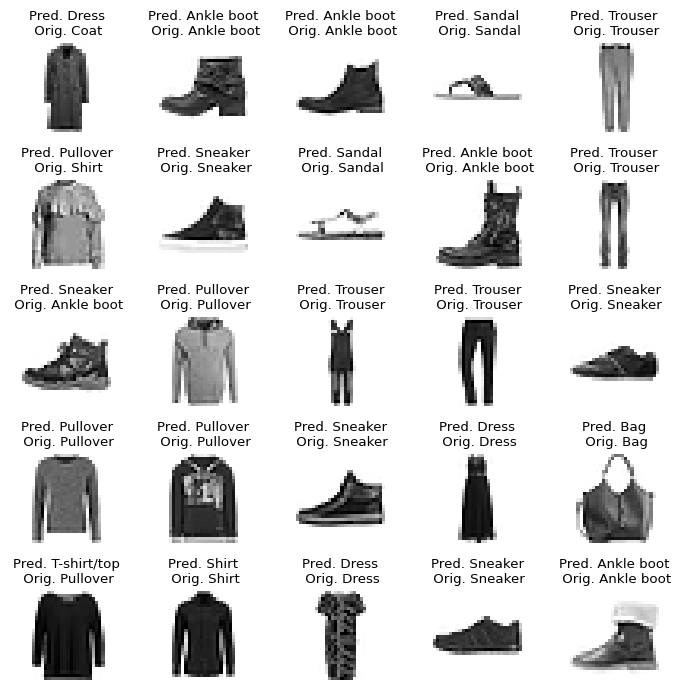

In [23]:
vis_samples(assign_HCGM, images,labels)

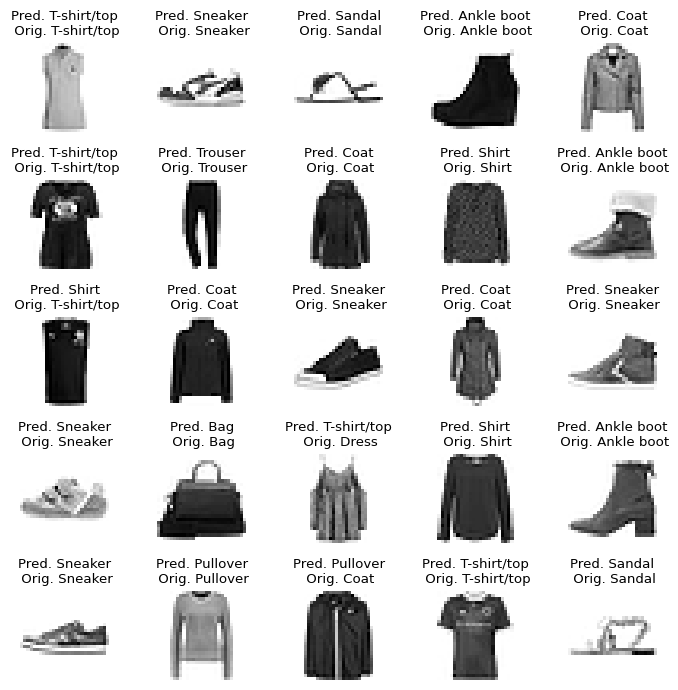

In [24]:
vis_samples(assign_PD3O, images,labels)

## References 

Xiao, Rasul & Vollgraf 2017,  Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

Peng & Wei 2007, Approximating K-means-type clustering via semidefinite programming

Yurtsever, Fercoq, Locatello & Cevher 2018, A Conditional Gradient Framework for Composite Convex Minimization with Applications to Semidefinite Programming